<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo5/extra/ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
from sklearn import metrics
y = np.array([0, 0, 1, 1, 1])
prob = np.array([0.1, 0.4, 0.35, 0.8, 0.2])
fpr, tpr, thresholds = metrics.roc_curve(y, prob, drop_intermediate = False)

In [45]:
def calulo_matriz_de_confusao(y, y_pred):
  '''
  ------------------------------------------------------------------------------
  Calculo da matriz de confusao
  ------------------------------------------------------------------------------
  @param y_pred - valores previstos
  @param y      - valores reais
  ------------------------------------------------------------------------------
  @return retorna a tupla (tn, tp, fn, fp):
          
          tn - verdadeiro negativo
          tp - verdadeiro positivo
          tn - falso negativo
          tn - falso positivo
  -----------------------------------------------------------------------------
  PS: 0 - negativo
      1 - positivo
  ------------------------------------------------------------------------------
  '''

  tn, tp, fn, fp= 0, 0, 0, 0
  for pyi, yi in zip(y_pred, y):
    # verdadeiro negativo
    if pyi == yi and pyi == 0:
      tn+=1
    # verdadeiro positivo
    elif pyi == yi and pyi == 1:
      tp+=1
    # falso positivo
    elif pyi != yi and pyi == 1:
      fp+=1
    # falso positivo
    elif pyi != yi and pyi == 0:
      fn+=1

  return tn, tp, fn, fp  

def classificao_para_um_limiar(y, y_prob, threshold):
  '''
  ------------------------------------------------------------------------------
  Calcula as taxas de falso positivo (fpr) e verdadeiro positivo (tpr) para um 
  determinado limiar
  ------------------------------------------------------------------------------
  @param y         - valores reais
  @param y_prob    - probabilidadas previstas
  @param threshold - limiar para o possitivo
  ------------------------------------------------------------------------------
  @return retorna a tupla (fpr, tpr):          
          fpr - taxas de falso positivo
          tpr - taxas de verdadeiro positivo
  ------------------------------------------------------------------------------
  '''
  def tpr(tp, fn):
    return tp/(tp+fn)

  def fpr(fp, tn):
    return fp/(fp+tn)

  y_previsto = (y_prob>=threshold).astype(int)

  tn, tp, fn, fp = calulo_matriz_de_confusao(y , y_previsto)

  return fpr(fp,tn), tpr(tp,fn) 

def curva_roc(y, y_prob):
  '''
  ------------------------------------------------------------------------------
  Calcula a curva roc
  ------------------------------------------------------------------------------
  @param y           - valores reais
  @param y_prob      - probabilidadas previstas
  ------------------------------------------------------------------------------
  @return retorna a tupla (fprs, tprs, limiares):          
          fprs - taxas de falso positivo (np.array)
          tprs - taxas de verdadeiro positivo (np.array)
          limiares - limiares utilizados
  ------------------------------------------------------------------------------
  '''
  fprs = [] 
  tprs = []

  limiares = np.concatenate((prob, prob[0]/2.0, prob[-1] + 1.5), axis=None)
  limiares = np.sort(limiares)

  for t in limiares:
    xi, yi = classificao_para_um_limiar(y, y_prob, t)
    fprs.append(xi)
    tprs.append(yi)

  return np.array(fprs), np.array(tprs), limiares

In [46]:
meu_fprs, meu_tprs, _ = curva_roc(y, prob)

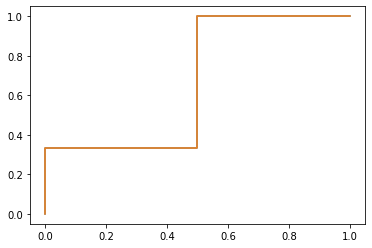

In [47]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot(meu_fprs, meu_tprs)